In [1]:
include("../ToolBox/ToolBox.jl")
import FileIO
import JLD
using .ToolBox
using .Geometry
using Colors
using Dates

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [2]:
function _sort_jld_files(file_list,date_position )
    name_list = [split(elem,".")[1] for elem in file_list]
    date_string = [split(elem,"_")[date_position] for elem in name_list]
    date = [Dates.Date(parse.(Int, [elem[1:4], elem[5:6], elem[7:8]])...) for elem in date_string]
    return file_list[sortperm(date)][end:-1:1]
end

function _sort_prossed_files(data_folder,sort_master = true)
    files = readdir(data_folder)

    files = [elem for elem in files if length(elem)>1]
    files = [elem for elem in files if length(split(elem,"_"))>3]

    coherence_idx = [split(elem,"_")[2]=="coh" for elem in files]
    coherence_files = files[coherence_idx ]  
    if sort_master 
        coherence_files = _sort_jld_files(coherence_files,6)
    else
        _sort_jld_files(coherence_files,8)
    end

    coherence_VV_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VV"]
    coherence_VH_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VH"]                    

    VV_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VV") for elem in files];
    VV_files = files[VV_idx] 
    VV_files = _sort_jld_files(VV_files,4)

    VH_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VH") for elem in files];
    VH_files= files[VH_idx];                 
    VH_files = _sort_jld_files(VH_files,4)
                                                
    return VV_files,VH_files,coherence_VV_files,coherence_VH_files 
end
                                                
function _load_jld(file_list,data_folder)
    path_names = [joinpath(data_folder,elem) for elem in file_list]
    return [JLD.load(elem,"data") for elem in path_names]
end

_load_jld (generic function with 1 method)

In [9]:
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(
    "/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/coherence6_fixed_poe");


In [12]:
coherence = _load_jld(coherence_VV_files, 
        "/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/coherence6_fixed_poe");

In [20]:
coherence_VV_files

29-element Array{String,1}:
 "6d_coh_AB_VV_M_20170824_S_20170830.jld" 
 "6d_coh_BA_VV_M_20170818_S_20170824.jld" 
 "6d_coh_AB_VV_M_20170812_S_20170818.jld" 
 "6d_coh_BA_VV_M_20170806_S_20170812.jld" 
 "6d_coh_AB_VV_M_20170731_S_20170806.jld" 
 "6d_coh_BA_VV_M_20170725_S_20170731.jld" 
 "6d_coh_AB_VV_M_20170719_S_20170725.jld" 
 "6d_coh_BA_VV_M_20170713_S_20170719.jld" 
 "12d_coh_BB_VV_M_20170701_S_20170713.jld"
 "6d_coh_AB_VV_M_20170625_S_20170701.jld" 
 "6d_coh_BA_VV_M_20170619_S_20170625.jld" 
 "6d_coh_AB_VV_M_20170613_S_20170619.jld" 
 "6d_coh_BA_VV_M_20170607_S_20170613.jld" 
 ⋮                                        
 "6d_coh_AB_VV_M_20170508_S_20170514.jld" 
 "6d_coh_BA_VV_M_20170502_S_20170508.jld" 
 "6d_coh_AB_VV_M_20170426_S_20170502.jld" 
 "6d_coh_BA_VV_M_20170420_S_20170426.jld" 
 "6d_coh_AB_VV_M_20170414_S_20170420.jld" 
 "6d_coh_BA_VV_M_20170408_S_20170414.jld" 
 "6d_coh_AB_VV_M_20170402_S_20170408.jld" 
 "6d_coh_BA_VV_M_20170327_S_20170402.jld" 
 "6d_coh_AB_VV_M_20170321_

In [28]:
coherence_VV_files[2]

"6d_coh_BA_VV_M_20170818_S_20170824.jld"

In [4]:

path = "/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/coherence6_fixed_poe/6d_coh_AB_VV_M_20170309_S_20170315.jld"
coh_test = JLD.load(path, "data");




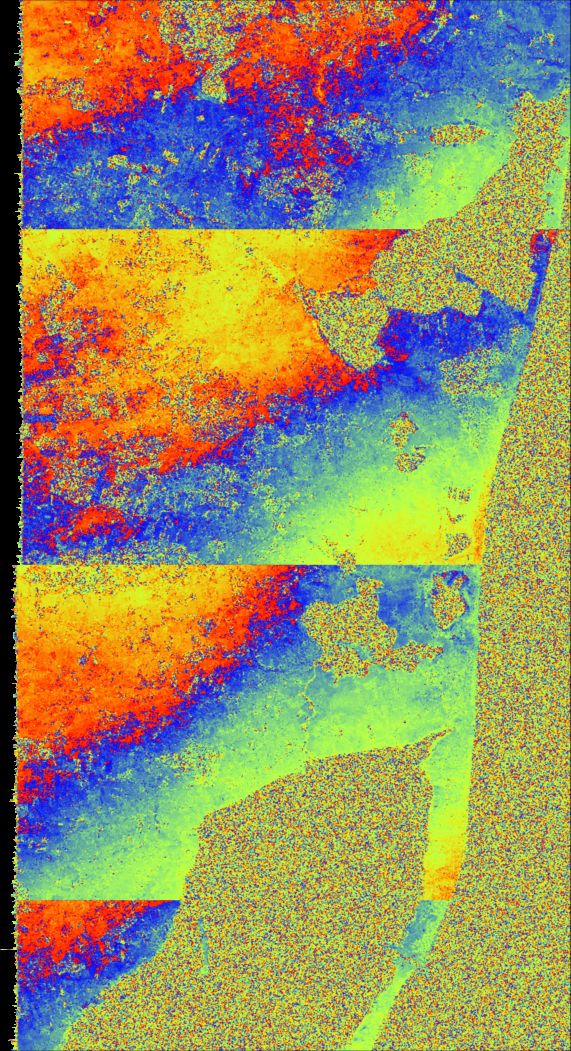

In [5]:
phase_img = SlcUtil.plot_phase(coh_test)

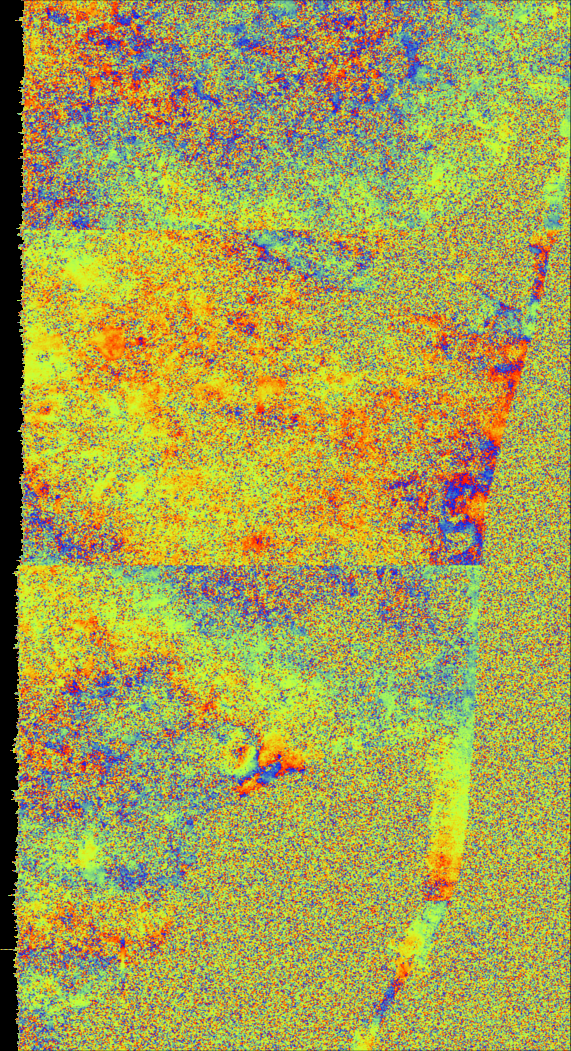

In [17]:
phase_img = SlcUtil.plot_phase(coherence[10])

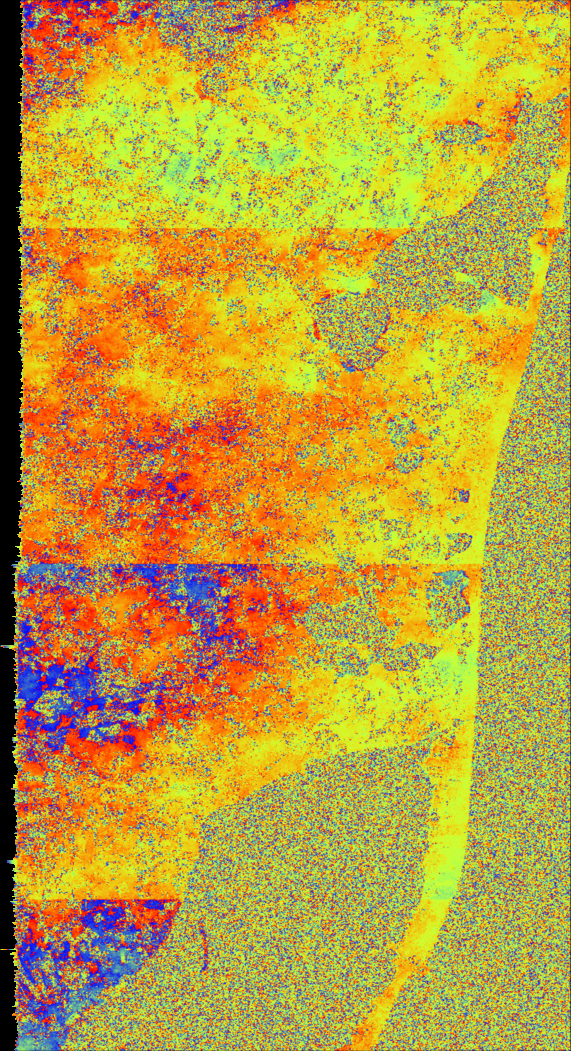

In [18]:
phase_img = SlcUtil.plot_phase(coherence[17])

In [ ]:
FileIO.save("Discussion_AB_infero.jpg",phase_img)